In [0]:
!ls -lh /home/kesci/input/bytedance/first-round/

# 基于Tfidf 的方法

In [0]:
import numpy as np
import csv
from itertools import islice
import pdb
import os
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.svm import SVC, LinearSVC, NuSVC

In [0]:
root = '/home/kesci/input/bytedance/first-round/'
file_train = 'train.csv'
file_test = 'test.csv'
path = os.path.join(root, file_train)
sql_max_length = 100
train_scale = 10000
valid_scale = 5000

data = {}
for k, length in zip(['train','valid'], [train_scale, valid_scale]):
    data[k] = {}
    for i in ['query','title']:
        data[k][i] = np.zeros((length, sql_max_length))
    data[k]['label'] = np.zeros((length,))

with open(path,'r') as myfile:
    lines = csv.reader(myfile)
    for index, line in enumerate(islice(lines, 0, train_scale)):
        for i,j in zip(['query','title'],[1,3]):
            info = np.array(list(map(int, line[j].split())))
            length = min(len(info),sql_max_length)
            data['train'][i][index,0:length] = info[0:length]
        data['train']['label'][index] = int(line[4])
            
    for index, line in enumerate(islice(lines, train_scale, valid_scale+train_scale)):
        for i,j in zip(['query','title'],[1,3]):
            info = np.array(list(map(int, line[j].split())))
            length = min(len(info),sql_max_length)
            data['valid'][i][index,0:length] = info[0:length]
        data['valid']['label'][index] = int(line[4])
            
# 做了padding 和 truncating， 返回固定长度（100）的sentence

## Tfidf + LR

In [0]:
vectorizer_2 = TfidfVectorizer()
vectorizer_2.fit(list(map(str,np.concatenate((data['train']['query'],data['train']['title'],
                data['valid']['query'],data['valid']['title']),axis=0))))
tfidf ={}
for j in ['train','valid']:
    tfidf[j] = {}
    for i in ['query','title']:
        tfidf[j][i] = vectorizer_2.transform(data[j][i]).toarray()
    tfidf[j]['label'] = np.array(data[j]['label'])
    tfidf[j]['input'] = np.concatenate(( tfidf[j]['query'],
        tfidf[j]['query'] - tfidf[j]['title'], 
        tfidf[j]['title']),
            axis=1, out=None)

NameError: name 'TfidfVectorizer' is not defined

|实验记录											      	|		测试集5000个 | 测试集10000个 内存20G|训练集15000，测试5000
|-------------------------------------|----------------|----------------|--------|
|当input由query，query-title，title组成，|acc= 0.7372 			|			0.7403 |  0.7408|
|当input由query，query-title组成，			|  acc= 0.7434|
|当input由query，title组成，						|	acc=0.7468|
|当input只由title组成，								|	acc= 0.748|
|当input由query组成，								|		acc= 0.7484|
|使用linear SVC                      |    acc = 0.6466         |

In [0]:
lr = LogisticRegression()
lr = LinearSVC()
lr.fit(tfidf['train']['input'], tfidf['train']['label'])
print('fit success!')
y_pred = lr.predict(tfidf['valid']['input'])
acc = np.sum(y_pred == tfidf['valid']['label'])

fit success!


In [0]:
acc = (np.sum(y_pred == tfidf['valid']['label']))/len(tfidf['valid']['label'])
print(acc)

0.6576


# CNN

1.1.0


In [0]:
# batch_size = 32
# def get_data(step, data, batch_size):
#     querys = torch.tensor(data['query'][step*batch_size:step*batch_size+batch_size], dtype=torch.long)
#     titles = torch.tensor(data['title'][step*batch_size:step*batch_size+batch_size],dtype=torch.long)
#     labels = torch.tensor(data['label'][step*batch_size:step*batch_size+batch_size],dtype=torch.long)
#     inputs = torch.cat((querys, titles), dim=1)
#     return inputs, labels
    
    
# for epoch in range(num_epoch):
#     print()
#     print('epoch:',epoch)
#     total_loss = 0
#     running_acc = 0.0
#     valid_acc = 0.0
#     model.train()
#     for step in range(int(data['train']['query'].shape[0] / batch_size)):
#         print('\r', step, end='')
#         inputs, labels = get_data(step, data['train'], batch_size)
#         #pdb.set_trace()
#         model.zero_grad()
#         outputs = model(inputs) # log_probs = 1 * 23046, embeds = 1*60
#         #pdb.set_trace()
#         loss = loss_function(outputs, labels)
#         total_loss += loss.item()
#         _, pred = torch.max(outputs,1)
#         running_acc += torch.sum(pred.data == labels.data)
#         if step%3 == 0:
#             print('loss=',loss.item(),'running_acc=',running_acc.item())
#         loss.backward()
#         optimizer.step()
#     train_acc = running_acc.double()/len(step*batch_size)
    
#     running_acc = 0.0
#     for step, batch in enumerate(iter(valid_iter)):
#         print('\r', step, end='')
#         model.eval()
#         inputs = batch.review.to(device)  # 100 * 16
#         targets = batch.label_binary.to(device) # 16
#         inputs = inputs.unsqueeze(2) # 100 * 16 * 1
#         inputs = inputs.permute(1,2,0)
                
#         model.zero_grad()
        
#         outputs = model(inputs) # log_probs = 1 * 23046, embeds = 1*60
#         #pdb.set_trace()
                
#         #loss = loss_function(outputs, targets)
#         #total_loss += loss.item()
        
#         _, pred = torch.max(outputs,1)
#         running_acc += torch.sum(pred == targets.data)
        
#     valid_acc = running_acc.double()/len(valid.examples)    

    
#     losses.append(total_loss)
#     print('epoch={} total_loss={:.4f} train_acc={:.4f} valid_acc={:.4f}'.format(epoch, total_loss, train_acc, valid_acc))
    


epoch: 0
 0loss= 0.710717499256134 running_acc= tensor(17)
 3loss= 0.5334789156913757 running_acc= tensor(82)
 6loss= 0.6626279950141907 running_acc= tensor(148)
 9loss= 0.7817811965942383 running_acc= tensor(212)
 12loss= 0.6612915992736816 running_acc= tensor(284)
 15loss= 0.8996951580047607 running_acc= tensor(352)
 18loss= 0.6115809679031372 running_acc= tensor(422)
 21loss= 0.6222792863845825 running_acc= tensor(486)
 24loss= 0.7421039342880249 running_acc= tensor(552)
 27loss= 0.795581042766571 running_acc= tensor(619)
 30loss= 0.8161972165107727 running_acc= tensor(684)
 33loss= 0.5987482070922852 running_acc= tensor(759)
 36loss= 0.6253782510757446 running_acc= tensor(830)
 39loss= 0.6437889337539673 running_acc= tensor(901)
 42loss= 0.5909598469734192 running_acc= tensor(972)
 45loss= 0.7640033960342407 running_acc= tensor(1027)
 48loss= 0.5679319500923157 running_acc= tensor(1094)
 51loss= 0.6361846923828125 running_acc= tensor(1165)
 54loss= 0.6828713417053223 running_acc= 

KeyboardInterrupt: 

# RNN attention + CNN 2019/05/30

### 建立词向量 fastText

### 安装fasttext

In [8]:
import os
!git clone https://github.com/facebookresearch/fastText.git
os.chdir('fastText')
!pip install .

fatal: destination path 'fastText' already exists and is not an empty directory.
Processing /content/fastText
  Stored in directory: /tmp/pip-ephem-wheel-cache-aib6eb96/wheels/a1/9f/52/696ce6c5c46325e840c76614ee5051458c0df10306987e7443
Successfully built fasttext


In [9]:
import time
from itertools import islice
import pdb
import torch
os.chdir('/content/')
!ls

fastText  sample_data


In [12]:
import fastText
!os.chdir(..)
import csv
with open('sample_train.txt', 'w') as f:
    #with open('../input/bytedance/first-round/train.csv') as csv_file:
    with open('train_data.sample') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            query = row[1]
            title = row[3]
            label = row[4]
            line_count+=1
            f.write("__label__{0} {1} {2}\n".format(label, query, title))
            if line_count > 1*10000: # 10000*10000 一亿条要一晚上
                break
            if line_count% 1e6 == 0:
                print(line_count/1e6,'百万')
        print(f'Processed {line_count} lines.')

/bin/bash: -c: line 0: syntax error near unexpected token `..'
/bin/bash: -c: line 0: `os.chdir(..)'
Processed 10001 lines.


In [0]:
#!head -n 5 labeled_content
!head -n 9000 train10000 > train9000.txt
!tail -n 1000 train10000 > valid1000.txt

In [15]:
since = time.time()
model = fastText.train_supervised(
   input = "sample_train.txt", epoch=25, lr=0.1, wordNgrams=2, verbose=2, minCount=1
)
print(time.time()-since)

8.967702150344849


In [0]:
result = model.test('valid.txt')
def print_results(N, p, r):
    print("N\t" + str(N))
    print("P@{}\t{:.3f}".format(1, p))
    print("R@{}\t{:.3f}".format(1, r))
print_results(*result)

In [0]:
print(model.get_dimension())

100


In [0]:
model.save_model("model.bin")
#loaded_model = fastText.load_model("model.bin")

In [0]:
print(model.get_input_matrix().shape)
print(model.get_output_matrix().shape)
print(len(model.get_words()))
print(model.get_word_vector('22'))
#print(model.get_word_vector('23'))
print('id',model.get_word_id('22'))
#print(model.get_input_matrix()[7])
print('22+22=',model.get_sentence_vector('22 22'))
#print(model.get_sentence_vector('22 23'))
#print(model.get_sentence_vector('22 34343 3434345645324').shape)

(2023885, 100)
(2, 100)
23885
[-0.00857826 -0.0582859   0.00541913  0.02087143 -0.02704096 -0.04855686
  0.06261121  0.00428706 -0.05668503 -0.03571691  0.05362597 -0.03948804
 -0.01707815 -0.0379849   0.05985313  0.01122388 -0.04075426 -0.01043027
  0.00387146  0.01628842 -0.01686643 -0.08128726 -0.04844168 -0.00448627
 -0.00934992  0.03206352 -0.00831332  0.06307277  0.03714691 -0.06296124
  0.0523917   0.00318891  0.04823148  0.02991723  0.0330345   0.00944853
  0.0168553  -0.00531108  0.01428792  0.0050365   0.00751749 -0.02754628
 -0.00047341 -0.00502049 -0.01116158  0.00715705 -0.00992763  0.01465497
  0.05383023 -0.02920387  0.03051862 -0.03568185  0.04135505 -0.03021663
  0.0280046   0.01603298  0.02707767 -0.00818382 -0.03789839 -0.04211527
  0.01543094 -0.05493718 -0.03773625 -0.04500303  0.01163789  0.00681081
  0.04258104 -0.02358605 -0.01216784 -0.02581844  0.02962485 -0.00083301
 -0.03062108  0.02632382  0.02813586 -0.00693136 -0.05490098 -0.01260491
 -0.0454154   0.00569

In [0]:
help(model)

Help on _FastText in module fastText.FastText object:

class _FastText(builtins.object)
 |  This class defines the API to inspect models and should not be used to
 |  create objects. It will be returned by functions such as load_model or
 |  train.
 |  
 |  In general this API assumes to be given only unicode for Python2 and the
 |  Python3 equvalent called str for any string-like arguments. All unicode
 |  strings are then encoded as UTF-8 and fed to the fastText C++ API.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, model=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_dimension(self)
 |      Get the dimension (size) of a lookup vector (hidden layer).
 |  
 |  get_input_matrix(self)
 |      Get a copy of the full input matrix of a Model. This only
 |      works if the model is not quantized.
 |  
 |  get_input_vector(self, ind)
 |      Given an index, get the corresponding vector of the Input Matrix.
 |  
 |  get_labels(self, include

## 定义了MyDataloader

In [0]:
class MyDataloader(object):
    def __init__(self, model, batch_size=32):
        self.task_name = 'train'
        self.file = None
        self.max_sql = 50
        self.batch_size= batch_size
#         self.train_file = '/home/kesci/input/bytedance/first-round/train.csv'
#         self.test_file = '/home/kesci/input/bytedance/first-round/test.csv'
        self.train_file = 'sample_train.csv'
        self.test_file = 'sample_test.csv'
        self.model = model

        
    def convert(self, line):
        query = torch.zeros((self.max_sql,1,100)) # 词向量长度为100
        #pdb.set_trace()
        for index, word in enumerate(islice(line[1].split(),0,self.max_sql)):
            query[index,0,:] = torch.tensor(model.get_word_vector(word))
            
        title = torch.zeros((self.max_sql,1,100)) # 词向量长度为100 [60*1*100]
        for index, word in enumerate(islice(line[3].split(),0,self.max_sql)):
            title[index,0,:] = torch.tensor(model.get_word_vector(word))
        
        try:
            label = torch.tensor(int(line[4]), dtype=torch.long)
        except:
            label = 0
            
        return query, title, label
        
    def set_train(self):
        self.task_name = 'train'
        f = open(self.train_file,'r')
        self.lines = csv.reader(f)
    
    def set_valid(self):
        self.task_name = 'valid'
        f = open(self.train_file,'r')
        self.lines = csv.reader(f)
        
    def set_test(self):
        self.task_name = 'test'
        f = open(self.test_file,'r')
        self.lines = csv.reader(f)
    
    def get_data(self):
        data = {}
        data['query'] = torch.zeros((self.max_sql, self.batch_size,100)) 
        data['title'] = torch.zeros((self.max_sql, self.batch_size,100)) 
        data['label'] = torch.zeros((self.batch_size), dtype=torch.long) # [1 * 32 * 1] 
        for step in range(0, self.batch_size):
            line = next(self.lines)
            query, title, label = self.convert(line)
            #pdb.set_trace()
            data['query'][:,step,:] = torch.squeeze(query)
            data['title'][:,step,:] = torch.squeeze(title)
            data['label'][step] = label
        return data
batch_size = 32
data_loader = MyDataloader(model, batch_size=batch_size)
data_loader.set_train()
data = data_loader.get_data()

In [111]:
for item in data:
    print(data[item].shape)
print(data['label'][0].dtype)

torch.Size([50, 32, 100])
torch.Size([50, 32, 100])
torch.Size([32])
torch.int64


### RNN + CNN

In [0]:
import torch.nn as nn
class RNNModel(nn.Module):

    def __init__(self, ninput=100, nhid=32, nlayers=4, LSTM=False, ATTEN=False, DOUBLE=True):
        super(RNNModel, self).__init__()
        self.drop = nn.Dropout(0.5)
        self.model_name = 'RNN'
        self.double = DOUBLE
        #self.encoder = nn.Embedding(nvoc, ninput)
        # WRITE CODE HERE witnin two '#' bar
        ########################################
        # Construct you RNN model here. You can add additional parameters to the function.
        if LSTM:
            print('model is a LSTM model')
            self.rnn = nn.LSTM(
                input_size=ninput,
                hidden_size=nhid,
                num_layers=nlayers,
                batch_first=False
            )
        else:
            print('model is a RNN model')
            self.rnn = nn.RNN(
                input_size=ninput,
                hidden_size=nhid,
                num_layers=nlayers,
                batch_first=False
            )

        if ATTEN:
            pass
        ########################################
        self.linear = nn.Linear(nhid, 2)
        self.cos = nn.CosineSimilarity(dim=0,eps=1e-6)
        
        #self.init_weights()
        self.nhid = nhid
        self.nlayers = nlayers
        #print('model is a RNN model')
    # def init_weights(self):
    #     init_uniform = 0.1
    #     self.encoder.weight.data.uniform_(-init_uniform, init_uniform)
    #     self.decoder.bias.data.zero_()
    #     self.decoder.weight.data.uniform_(-init_uniform, init_uniform)

    def forward(self, in1, in2): # input  shape [60,32,100]
        drop1 = self.drop(in1) # shape [60, 32, 100]
        drop2 = self.drop(in2)
        # WRITE CODE HERE within two '#' bar
        ########################################
        # With embeddings, you can get your output here.
        # Output has the dimension of sequence_length * batch_size * number of classes
        output1, h_state = self.rnn(drop1, None) # shape [60,32,64], [2,32,64]
        output2, h_state = self.rnn(drop2, None)
        # r_out [seq, batch, h_dim * 方向 = 64*1]
        # h_n = [层数*方向=1*1, batch, h_dim]
        cos_distance = - self.cos(output1, output2) # [32,64] 距离越靠近1越好
        ########################################

        #output = self.drop(output)
        out = self.linear(cos_distance)
        # shape [700, 10000]
        return out


In [0]:
# CNN
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(2019 )

class CNNModel(nn.Module):
    def __init__(self, ninput=100, nhid=32, n_out=2, method='1'):
        super(CNNModel, self).__init__()
        self.drop = nn.Dropout(0.5)
        self.model_name = 'CNN'
        self.method = method
        self.activ = nn.Tanh()
        self.relu = nn.ReLU(inplace=True)
        print('this is a CNN net, method=',method)
        ########################################################################################
        self.conv1 = nn.Sequential(nn.Conv2d(1, nhid,  kernel_size=(5,10), stride=(1,5)),
                                   nn.BatchNorm2d(nhid),
                                   self.activ)
        self.conv2 = nn.Sequential(nn.Conv2d(nhid, nhid*2, kernel_size=(5,10), stride=(2,5)),
                                   nn.BatchNorm2d(nhid*2),
                                   self.activ,
                                   nn.Dropout2d(0.5))
        self.conv3 = nn.Sequential(nn.Conv2d(nhid*2, nhid*2, kernel_size=(3,2), stride=(2,1)),
                                   nn.BatchNorm2d(nhid*2),
                                   self.activ)
        self.conv4 = nn.Sequential(nn.Conv2d(64, 64, kernel_size=(3,1), stride=1),
                                  nn.BatchNorm2d(64),
                                  self.activ,
                                  nn.Dropout2d(0.5))
        self.conv = nn.Sequential(self.conv1,self.conv2,self.conv3,self.conv4)
        ##########################################################################################
        self.cos = nn.CosineSimilarity(dim=2,eps=1e-6)                           
        self.linear1 = nn.Linear(64, 32)                           
        self.linear2 = nn.Linear(512, 32)
        self.linear_last = nn.Linear(32,n_out)
    def forward(self, in1, in2): # inputs = 30 * 16 * 100   32是batch_size
        if self.method == '1':
            in1 = torch.unsqueeze(torch.transpose(in1,0,1),1) # 16 1 30 100
            in2 = torch.unsqueeze(torch.transpose(in2,0,1),1)
            #pdb.set_trace()
            out1 =self.conv(in1) # 16 64 4 1
            out2 =self.conv(in2)
            cos_distance = torch.exp(- self.cos(out1, out2)) # 64 4 1
            #pdb.set_trace()
            out = self.linear_last(self.relu(self.linear1(cos_distance.squeeze())))
        elif self.method == '2':
            in1 = torch.unsqueeze(torch.transpose(in1,0,1),1) # 16 1 30 100
            in2 = torch.unsqueeze(torch.transpose(in2,0,1),1)
            inputs = torch.cat((in1, in2),dim=1)
            out = self.conv(inputs)
            #pdb.set_trace()
            out = out.view(out.size(0),-1)
            #pdb.set_trace()
            out = self.linear_last(nn.ReLU(self.linear2(out)))
#         else:   

#             inputs = torch.cat((in1, in2),dim=0)
#             out = torch.transpose(inputs, 0, 1)                                #在CNN里，是256*3*64*64
#             out = torch.unsqueeze(out, 1) # 16 * 1 * 30 * 100
#             #pdb.set_trace()
#             out = [F.relu(conv(x)) for conv in self.conv] # 16 * 16 * 28 * 1 
#     #         out = self.conv2(out)
#     #         out = self.conv3(out)
#     #         out = self.conv4(out)  

#             out = out.view(out.size(0),-1)
#             out = self.linear(out)
        return out

第一次试验 CNN 100epoch 最高qAUC=0.52 

## 训练开始

In [0]:
batch_size = 32
#net = RNNModel()
net = CNNModel()
#net.init_weights()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam( net.parameters(), lr=0.001, betas=(0.9, 0.99), amsgrad=True, weight_decay = 1e-5)
net.train()

Task_name = 'CNN'
name = 'curve3'
# if not os.path.exists('result_'+ Task_name):
#     with open(os.path.join('./result_csv','result_'+ Task_name+ '.csv'), 'w') as f:
#         info = '_ninput:'+str(ninput)+'_nhid:'+str(nhid)+'_nlayers:'+str(nlayers)
#         writer = csv.writer(f)
#         writer.writerow(['epoch','train_perplexity','train_acc','test_perplexity','test_acc','time(m)',info])
# else:
#     raise SystemExit('please change Task_name!')
since = time.time()
best_qAUC = 0.0
with open(name+'.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerow(['train_epoch_loss', 'train_epoch_acc', 'test_qAUC'])
for epoch in range(1, 200):
    code_time = (time.time()-since)/60
    print()
    print('epoch',epoch, 'time(m)', int(code_time))
    best_test_epoch_loss = 10000
    net, train_epoch_loss, train_epoch_acc = train(net, data_loader)
    
    if epoch % 1 == 0:
        train_model("No","sample_test.csv","result.csv")
        qAUC = cal_Auc("sample_test.csv","result.csv")
    with open(name+'.csv', 'a') as f:
        writer = csv.writer(f)
        writer.writerow([train_epoch_loss, train_epoch_acc, qAUC])
    print('Saving train_loss:{:.4f} train_acc:{:.4f} test_qAUC:{:.4f}'.
          format(train_epoch_loss, train_epoch_acc, qAUC))
    #model, test_epoch_loss, test_epoch_acc = evaluate(model, data_loader)
#     with open(os.path.join('./result_csv','result_'+ Task_name+ '.csv'), 'a') as f:
#         writer = csv.writer(f)
#         writer.writerow([epoch, train_epoch_loss, train_epoch_acc.item(), test_epoch_loss, test_epoch_acc.item(), code_time])
    if best_qAUC < qAUC:
        best_qAUC = qAUC
        torch.save(net, name+'.pkl')
        print('model saved!')


this is a CNN net, method= 1

epoch 1 time(m) 0
 100 train_loss:0.6479 running_acc:0.7416
 200 train_loss:0.6465 running_acc:0.7462
 300 train_loss:0.6456 running_acc:0.7470
 400 train_loss:0.6452 running_acc:0.7430
 500 train_loss:0.6450 running_acc:0.7458
 529Saving train_loss:0.6448 train_acc:0.7468 test_qAUC:0.5227
model saved!

epoch 2 time(m) 2
 1

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type CNNModel. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


 100 train_loss:0.6443 running_acc:0.7472
 200 train_loss:0.6444 running_acc:0.7491
 300 train_loss:0.6440 running_acc:0.7489
 400 train_loss:0.6440 running_acc:0.7445
 500 train_loss:0.6439 running_acc:0.7469
 529Saving train_loss:0.6439 train_acc:0.7478 test_qAUC:0.4827

epoch 3 time(m) 4
 100 train_loss:0.6442 running_acc:0.7472
 200 train_loss:0.6438 running_acc:0.7491
 300 train_loss:0.6438 running_acc:0.7489
 400 train_loss:0.6435 running_acc:0.7445
 500 train_loss:0.6436 running_acc:0.7469
 529Saving train_loss:0.6437 train_acc:0.7478 test_qAUC:0.4973

epoch 4 time(m) 6
 100 train_loss:0.6428 running_acc:0.7472
 200 train_loss:0.6431 running_acc:0.7491
 300 train_loss:0.6435 running_acc:0.7489
 400 train_loss:0.6434 running_acc:0.7445
 500 train_loss:0.6435 running_acc:0.7469
 529Saving train_loss:0.6434 train_acc:0.7478 test_qAUC:0.5084

epoch 5 time(m) 8
 100 train_loss:0.6439 running_acc:0.7472
 200 train_loss:0.6433 running_acc:0.7491
 300 train_loss:0.6436 running_acc:0.748

In [0]:
def train(net, data_loader):
    net.train()
    data_loader.set_train()
    running_acc = 0.0
    running_loss = 0.0
    for i in range(1,int(17000/batch_size)-1):
        print('\r',i, end='')
        optimizer.zero_grad()
        data_input = data_loader.get_data()
        output = net(data_input['query'], data_input['title']) # output.shape=[32,2]
        _, pred = torch.max(output,1)
        #_, pred_top5 = torch.topk(output, 1000, dim=1)
        loss = criterion(output, data['label'])
        loss.backward()
        optimizer.step()
        #pdb.set_trace()
        running_loss += loss.item() * batch_size
        running_acc += torch.sum(pred.data == data_input['label'].data).item()
        #epdb.set_trace()

        if i%100 == 0:
            print(' train_loss:{:.4f} running_acc:{:.4f}'.
            format(running_loss / (i * batch_size) , running_acc/(i*batch_size)))
            
    epoch_loss = running_loss / (i * batch_size)
    epoch_acc = running_acc / (i * batch_size)
    time1 = time.time()-since
    #print()
    return net, epoch_loss, epoch_acc
########################################

In [0]:
# coding=utf-8
#from memory_profiler import memory_usage, profile
import time
import csv
import random

# 用于填写模型训练代码
#@profile
def train_model(train_path, test_path, result_path):
    with open(test_path, "r") as test, open(result_path, "w") as result:
        test_data = csv.reader(test)
        wirter = csv.writer(result)
        # wirter.writerow("1")
        for row_num, row in enumerate(test_data):
            # print("%s,%s,%s" % (row[0], row[2], random.random()))
            process_data = []
            process_data.append(row[0])
            process_data.append(row[2])
            net.eval()
            query, title, label = data_loader.convert(row)
            mypred = net(query, title)
            #pdb.set_trace()
            mypred = nn.functional.softmax(mypred.squeeze(),dim=0)
            #pdb.set_trace()
            process_data.append(mypred[1].item())
            #pdb.set_trace()
            wirter.writerow(process_data)

# if __name__ == "__main__":
#     time_before = time.time()
#     train_model("No",
#                 "sample_test.csv",
#                 "result.csv")
#     time_aft = time.time()
#     print(time_aft - time_before)

In [0]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score


def cal_Auc(test_path, result_path):
    # y_true = [0, 0, 1, 1]
    # y_scores = [0.1, 0.4, 0.35, 0.8]
    df_test = pd.read_csv(test_path, encoding='utf-8', header=-1)
    df_result = pd.read_csv(result_path, encoding='utf-8', header=-1)
    query_num = list(set(df_test.iloc[:, 0]))
    # print(len(query_num))
    query_total = len(query_num)
    auc_sum = 0
    # columns = df_test.columns.values.tolist()
    # print(columns)
    # print(df_test[df_test.iloc[:, 0]==2717])
    for query in query_num:
        one_query_test = list(df_test[df_test.iloc[:, 0] == query].iloc[:, -1])
        one_query_result = list(df_result[df_test.iloc[:, 0] == query].iloc[:, -1])
        try:
            auc_sum += roc_auc_score(one_query_test, one_query_result)
            # print(roc_auc_score(one_query_test, one_query_result))
        except:
            auc_sum += 0.5

    score = auc_sum / query_total
    return score


# if __name__ == "__main__":
#     cal_Auc("sample_test.csv",
#             "result.csv")

In [0]:
roc_auc_score([0.1,0.1,0.05],[0,0,0])

In [0]:
# net = CNNModel()
# net.eval()
# def test_write_result(model):
#     data_loader = MyDataloader(model)
#     #net = torch.load()
#     with open('result_csv.csv','w') as f_result:
#         result_writer = csv.writer(f_result)
#         with open('/home/kesci/input/bytedance/first-round/test.csv','r') as f:
#             lines = csv.reader(f)
#             for step, line in enumerate(lines):
#                 if step % 10 == 0:
#                     print('\r', step, end='')
#                 query_id = line[0]
#                 query_title_id = line[2]
#                 query = line[1]
#                 title = line[3]
#                 #pdb.set_trace()
#                 query, title, label = data_loader.convert(line)
#                 #pdb.set_trace()
#                 mypred = net(query, title)
#                 #pdb.set_trace()
#                 result_writer.writerow([query_id, query_title_id, mypred.data[0,1]])
        
# test_write_result(model)

 1140

KeyboardInterrupt: 

In [0]:
# import csv
# import numpy as np
# from matplotlib import pyplot as plt
# #Task_list = ['CNN']
# def myplot(*Task_list):
#     plt.figure()
#     color_list = ['blue','orange','green']
#     for i, task in enumerate(Task_list):
#         epoch_list = []
#         train_acc_list = []
#         valid_acc_list = []
#         with open('curve.csv', 'r') as f:
#             f_csv = csv.reader(f)
#             headers = next(f_csv)
#             for row in f_csv:
#                 train_loss_list.append(float(row[0]))
#                 train_acc_list.append(float(row[1]))
#                 valid_qAUC_list.append(float(row[2]))        
#         epoch_list = range(0,len(train_acc_list))
#         plt.plot(epoch_list,train_acc_list,'-.',color=color_list[i])
#         plt.plot(epoch_list,valid_acc_list,color=color_list[i])
#         plt.plot(epoch_list,train_acc_list,'-.',color=color_list[i])
#         plt.plot(epoch_list,valid_acc_list,color=color_list[i])   
#     plt.xlim([0,100])
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     myfig = plt.gcf()
#     myfig.savefig('best_model_new.eps',format='eps',dpi=1000)
#     myfig.savefig('best_model_new.png',format='png',dpi=1000)
#     plt.show()

# f_csv = myplot('CNN')

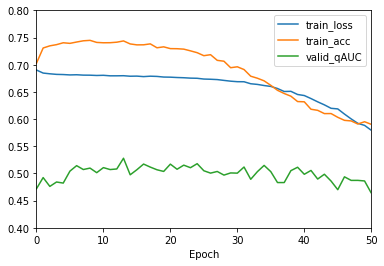

In [120]:
import csv
import numpy as np
from matplotlib import pyplot as plt
def myplot(*Task_list):
    plt.figure(facecolor='w')

    train_loss_list = []
    train_acc_list = []
    valid_qAUC_list = []
    with open(name+'.csv', 'r') as f:
        f_csv = csv.reader(f)
        headers = next(f_csv)
        for row in f_csv:
            train_loss_list.append(float(row[0]))
            train_acc_list.append(float(row[1]))
            valid_qAUC_list.append(float(row[2]))        
        epoch_list = range(0,len(train_acc_list))
    plt.plot(epoch_list,train_loss_list)
    plt.plot(epoch_list,train_acc_list)
    plt.plot(epoch_list,valid_qAUC_list)
    plt.legend(['train_loss','train_acc','valid_qAUC'])
          
    plt.xlim([0,50])
    plt.ylim([0.4,0.8])
    plt.xlabel('Epoch')
    #plt.ylabel('Accuracy')
    myfig = plt.gcf()
    myfig.savefig(name+'.eps',format='eps',dpi=500)
    myfig.savefig(name+'.png',format='png',dpi=500)
    plt.show()

f_csv = myplot('CNN')

## 线下测试代码

In [0]:
# coding=utf-8
# 分割CSV
import csv
def sample_div(input_path, output1_path, output2_path):
    with open(input_path, "r") as input, open(output1_path, "w") as output1, open(output2_path, "w") as output2:
        input_data = csv.reader(input)
        writer = csv.writer(output1)
        writer2 = csv.writer(output2)
        for row_num, row in enumerate(input_data):
            if row_num < 17000:
                writer.writerow(row)
            else:
                writer2.writerow(row)

if __name__ == '__main__':
    sample_div("train_data.sample",
               "sample_train.csv",
               "sample_test.csv")

In [0]:
# 查看当前挂载的数据集目录
!ls /home/kesci/input/

bytedance


In [0]:
# 查看个人持久化工作区文件
!ls /home/kesci/work/

lost+found


In [0]:
# 查看当前kernerl下的package
!pip list --format=columns

In [0]:
# 显示cell运行时长
%load_ext klab-autotime